# **Assignment 1 - Image Captioning**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Assignments</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://repository-images.githubusercontent.com/83958320/8f162500-8ace-11e9-94ee-0b86d27bbc5e" alt="1" border="0">

This notebook contains the required task for the **first assignment** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

Your task is to train your **own custom image captioning model** and compare its performance with an existing **pre-trained** model. You will work with the `Flickr8k` [dataset](https://www.kaggle.com/datasets/adityajn105/flickr8k), ensuring it is properly split into **training, validation,** and **test** sets. The model should follow an **Encoder-Decoder + Attention** structure, where the encoder can use a **pre-trained backbone** such as *ResNet*, but it must be **fine-tuned**. An **attention layer** is required to visualize what the network has learned. After training, you will **evaluate and compare** the performance of your model against a **pre-trained** one, analyzing the **generated captions** and the **attention mechanisms**.

The `Flickr8k` dataset consists of **8000 images**, each paired with **5 captions**, resulting in a total of **40,000 captions**. It is your **design choice** how you implement the **dataset and batching process**. A common approach is to treat each caption as a separate data point, yielding **40,000 datapoints** in total.

The **tokenization process** is also up to you. Since the dataset contains a vast vocabulary, it may include words that appear only once. To improve model efficiency, it is **good practice to limit the vocabulary size**.

During **validation and testing**, every image has **5 reference captions**. To ensure a robust `BLEU` **score calculation**, it is recommended to compute `BLEU` scores using **all 5 matching captions** as reference captions for each image.

# **Expectations**

- Your model is **not expected to achieve state-of-the-art performance**, but it should perform **better than random guessing**. The **loss should decrease** throughout training, and the model’s performance should be monitored to prevent overfitting or underfitting.

- You will work with the `Flickr8k` dataset, which should be split into **train, validation, and test** sets. The `training` set is used to train the image captioning model, the `validation` set helps fine-tune hyperparameters and monitor performance, and the `test` set is used for final evaluation.

- To assess model performance, include **visualizations of loss values** and **evaluation metrics** for the dataset splits.

- You are free to choose any **pre-trained model** (`blip`, `vit-gpt2-flickr8k`, etc.) for model comparison at the end.

# **Requirements**

- Data Preparation and Visualization:
  - Ensure the **Flickr8k dataset** is correctly split into **train, validation, and test sets**.
  - Display **sample images with their original captions**.
  - Visualize **tokenized captions** to ensure proper preprocessing.

- Model Training and Performance Monitoring:
  - Train an **Encoder-Decoder + Attention** model using the training set.
  - Track **training and validation loss** using visualizations (e.g., `Matplotlib`, `Seaborn`).
  - Monitor **BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores** for a greedy decoder throughout training.

- Implement **techniques to avoid overfitting**, such as:
    - **Early stopping** to halt training when validation loss stops improving.
    - **Regularization** (e.g., dropout, weight decay) to improve generalization.
    - **Experimenting with different loss functions** to find the most effective approach.
    - **Saving the best-performing model** during training for later evaluation.

- Model Comparison:
  - Evaluate and compare your **custom-trained model** with a **pre-trained model** on the same batch of test images.
  - **Visualize generated captions** and compare them to ground-truth captions.
  - Compute **BLEU scores** using all five reference captions for a given image.
  - Analyze and explain the **strengths and weaknesses** of both models based on performance differences.

- Optionally, use **WandB (Weights and Biases)** or **TensorBoard** to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.

In [1]:
# # @title Image Captioning Tasks
# # %%capture flowchart_output
# # HIDDEN CELL
# from graphviz import Digraph
# from IPython.display import Image as IMG

# def create_flowchart(output_filename='flowchart'):
#     dot = Digraph(name='Simplified Object Detection', format='png')
#     dot.attr(rankdir='LR')
#     dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

#     dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

#     dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')

#     dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')

#     dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Moderate)', fillcolor='#F6D49A')

#     dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
#     dot.node('CreateModel', 'Create the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

#     dot.node('Hyperparameters', 'Define Loss Function and Optimizer\n(Moderate)', fillcolor='#F6D49A')

#     dot.node('TrainModel', 'Train the Image Captioning Model\n(Difficult)', fillcolor='#F6A0A0')

#     dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
#     dot.node('VisualizeAtt', 'Visualize Attention Weights\n(Moderate)', fillcolor='#F6D49A')
#     dot.node('RunInference', 'Run Inference on the Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

#     dot.node('LoadModel', 'Load an Existing Image Captioning Model\n(Easy)', fillcolor='#A0E7A0')

#     dot.node('EvaluateModel', 'Evaluate the Existing Image Captioning Model\n(Moderate)', fillcolor='#F6D49A')

#     dot.node('Comparison', 'Compare the Two Models\n(Difficult)', fillcolor='#F6A0A0')

#     # Edges
#     dot.edge('Imports', 'LoadData')

#     dot.edge('LoadData', 'AugmentData')

#     dot.edge('AugmentData', 'DatasetDataloader')

#     dot.edge('DatasetDataloader', 'CreateModel')
#     dot.edge('DatasetDataloader', 'VisualizeSample')

#     dot.edge('CreateModel', 'Hyperparameters')
#     dot.edge('Hyperparameters', 'TrainModel')
#     dot.edge('TrainModel', 'VisualizeTrain')
#     dot.edge('TrainModel', 'VisualizeAtt')
#     dot.edge('TrainModel', 'RunInference')

#     dot.edge('DatasetDataloader', 'LoadModel')
#     dot.edge('LoadModel', 'EvaluateModel')
#     dot.edge('RunInference', 'Comparison')
#     dot.edge('EvaluateModel', 'Comparison')

#     dot.render(output_filename, view=False)

# create_flowchart('assignment1_flowchart')
# IMG('assignment1_flowchart.png')

Each section of the Notebook will guide you through the task:

- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- The model is **not expected to achieve high performance** but must perform better than random color guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is November 25th Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

**In order to get your grade for an assignment, you must defend it by answering questions during the designated practice time.**

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:Muhammad Faran Akram**  
**Neptun ID:dolw0e**

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [2]:
# !pip install nltk 
# !pip install torch
# !pip install torchvision 
# !pip install --upgrade --force-reinstall numpy matplotlib
# !pip install --upgrade pyparsing





In [3]:
import os
import torch 
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(f"Using device: {device}")

[nltk_data] Downloading package punkt to /home/muhammad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/muhammad/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/home/muhammad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Using device: cuda:0


## **1. Data Loading Process**

For this assignment you will be using the [Flickr8k](https://www.kaggle.com/datasets/adityajn105/flickr8k) dataset, which contains **captions/descriptions** of different images.

<img src="https://user-images.githubusercontent.com/38347541/56469847-9faa0780-645c-11e9-822a-11a15bb56f5b.png" alt="1" border="0">

The best way to download this dataset is through `Kaggle`. First **create a token**, download it and upload it here. Follow [these](https://www.kaggle.com/discussions/general/74235) steps.

In [4]:
# ! pip install -q kaggle
# !kaggle datasets download -d adityajn105/flickr8k

In [5]:
# !unzip *.zip && rm *.zip

## **2. Defining Augmentations**

When applying **augmentations** to the `Flickr8k` dataset, it is important to note that these transformations should be applied **only to the images** and not to the captions.

Ensure that your **data augmentation pipeline** includes:
- A **normalization step** to scale pixel values appropriately.
- A **tensor conversion step** to transform images into tensors for model compatibility.
- Additional **augmentations of your choice**, such as random cropping, flipping, or color jittering, to enhance model generalization.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

In [6]:
# ADD YOUR CODE HERE
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225])
])

## **3. Creating Datasets and Dataloaders**

To load the **Flickr8k** dataset, you need to create a **custom PyTorch** `Dataset` class that returns **images and their corresponding captions**. The captions should be **tokenized** before being returned.

Make sure to include special tokens in your tokenized captions:
- `sos` (Start of Sentence)
- `eos` (End of Sentence)
- `unk` (Unknown Token) for words outside the vocabulary.

It is recommended to build a **Vocabulary class** to store all the words in your dataset, as your model can only generate words that exist in this vocabulary. However, saving every word is unnecessary. A **common practice** is to include only words that appear **at least 5 times** across the entire dataset to reduce noise and improve model efficiency.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

> **Note**: Remember that, a batch has **different examples**, and each example (caption) might have **different sizes**. Therefore, consider padding techniques for the captions.

```python
class FlickrDataset(Dataset):
    def __init__(self,):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [7]:
# ADD YOUR CODE HERE
class Vocab():
    def __init__(self, catptions,freq_threshold=5):
        self.freq_threshold = freq_threshold
        self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"} # index to string
        self.stoi = {v: k for k, v in self.itos.items()} # reverse mapping
        self.freqs = {} # word frequencies
        self.text=catptions

    def __len__(self):
        return len(self.itos)

    def tokenizer(self, text):
        return nltk.tokenize.word_tokenize(text.lower()) #nltk word tokenizer

    def build_vocabulary(self, sentence_list):
        idx = 4
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in self.freqs:
                    self.freqs[word] = 1
                else:
                    self.freqs[word] += 1

                if self.freqs[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1

    def numericalize(self, text): #tecxt to indices
        tokenized_text = self.tokenizer(text)
        return [
            self.stoi.get(token, self.stoi["<UNK>"])
            for token in tokenized_text
        ]
    def denumericalize(self, indices): #indices to text
        return [
            self.itos.get(index, "<UNK>")
            for index in indices
        ]
    
### Test the Vocab class###
captions = [
    "A dog is running",
    "A cat is running",
    "A dog is sleeping"
]
vocab = Vocab(captions, freq_threshold=2)
print(vocab.itos)
print(vocab.stoi)
vocab.build_vocabulary(captions)
print(vocab.stoi)
print(vocab.numericalize("A dog is running fast")) #fast is <UNK> in captions


{0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>'}
{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3}
{'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3, 'a': 4, 'is': 5, 'running': 6, 'dog': 7}
[4, 7, 5, 6, 3]


In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image
import torch

class FlickrDataset(Dataset):
    def __init__(self, data_root, captions_file, transform=None, freq_threshold=5):
        self.data_root = data_root
        self.captions_file = captions_file
        self.transform = transform
 
        with open(captions_file, 'r') as f:
            lines = f.readlines()

        self.imgs = []
        self.captions = []

        for line in lines[1:]:  # Skip header
            img, caption = line.strip().split(',', 1)
  
            self.imgs.append(img)
            self.captions.append(caption)
 
        self.vocab = Vocab(self.captions, freq_threshold)
        self.vocab.build_vocabulary(self.captions)
 
    def __len__(self):
        return len(self.captions)
 
    def __getitem__(self, idx):
        # 1. Get image path
        img_name = self.imgs[idx] #read from cattions file
        img_path = os.path.join(self.data_root, img_name) #getting original image path

        # 2. Load image
        image = Image.open(img_path).convert("RGB")

        # 3. Apply transforms 
        if self.transform:
            image = self.transform(image)

        # 4. Get caption and add special tokens
        caption = self.captions[idx] 
        caption = "<SOS> " + caption + " <EOS>"

        # 5. Convert caption to indices
        numericalized_caption = self.vocab.numericalize(caption)

        # 6. Convert caption to tensor
        caption_tensor = torch.tensor(numericalized_caption)

        # 7. Return image tensor and caption tensor
        return image, caption_tensor



In [9]:
 
data_root = "Images/"                
captions_file = "captions.txt"       
  
dataset = FlickrDataset(data_root, captions_file, transform=None, freq_threshold=5)
 
print("Dataset length:", len(dataset))
 
sample_idx = 0
image, caption_tensor = dataset[sample_idx]

print("Image type:", type(image))
print("Image shape:", image.shape if isinstance(image, torch.Tensor) else "PIL Image")
print("Caption tensor:", caption_tensor)
print("Caption tensor shape:", caption_tensor.shape)
 
for i in range(min(5, len(dataset))):
    img, cap = dataset[i]
    print(f"Sample {i}: img shape {img.shape if isinstance(img, torch.Tensor) else 'PIL'}, caption length {len(cap)}")
 
print("Vocabulary size:", len(dataset.vocab))
print("First 10 word->index mappings:", list(dataset.vocab.stoi.items())[:10])


Dataset length: 40455
Image type: <class 'PIL.Image.Image'>
Image shape: PIL Image
Caption tensor: tensor([  3,   3,   3,   4,  28,   8,   4, 192, 150,  17,  32,  69,   4, 349,
         11, 704,   8,  24,   3, 493,   5,   3,   3,   3])
Caption tensor shape: torch.Size([24])
Sample 0: img shape PIL, caption length 24
Sample 1: img shape PIL, caption length 14
Sample 2: img shape PIL, caption length 15
Sample 3: img shape PIL, caption length 16
Sample 4: img shape PIL, caption length 19
Vocabulary size: 3006
First 10 word->index mappings: [('<PAD>', 0), ('<SOS>', 1), ('<EOS>', 2), ('<UNK>', 3), ('a', 4), ('.', 5), ('dog', 6), ('girl', 7), ('in', 8), ('little', 9)]


In [10]:
from torch.nn.utils.rnn import pad_sequence
import torch

def collate_fn(batch):
    images = [item[0] for item in batch]          
    captions = [item[1] for item in batch]        
 
    images = torch.stack(images)
    # Pad captions to same length
    captions_padded = pad_sequence(captions, batch_first=True, padding_value=0)  # <PAD> index = 0

    return images, captions_padded


In [ ]:
from torch.utils.data import random_split

total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size   = int(0.1 * total_size)
test_size  = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
print(f"Train size: {len(train_dataset)}, Val size: {len(val_dataset)}, Test size: {len(test_dataset)}")

print("Total captions:", len(dataset))
print("Unique images:", len(set(dataset.imgs)))


Train size: 32364, Val size: 4045, Test size: 4046
Total captions: 40455
Unique images: 8091


In [12]:
train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform   = test_transforms
test_dataset.dataset.transform  = test_transforms

batch_size =32
num_workers = 8
pin_memory = True
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          collate_fn=collate_fn, num_workers=num_workers,
                          pin_memory=pin_memory, persistent_workers=(num_workers>0))

val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=True,
                          collate_fn=collate_fn, num_workers=num_workers,
                          pin_memory=pin_memory, persistent_workers=(num_workers>0))

test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                          collate_fn=collate_fn)

dataloaders = {
    'train': train_loader,
    'val': val_loader,
    'test': test_loader
}


## **4.1 Visualizing Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-target** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

Make sure to **visualize the original and the tokenized caption** as well!

```python
def visualize_batch():
  raise NotImplementedError
```

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9980307..2.3585434].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.622571].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8556864].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5870366..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping

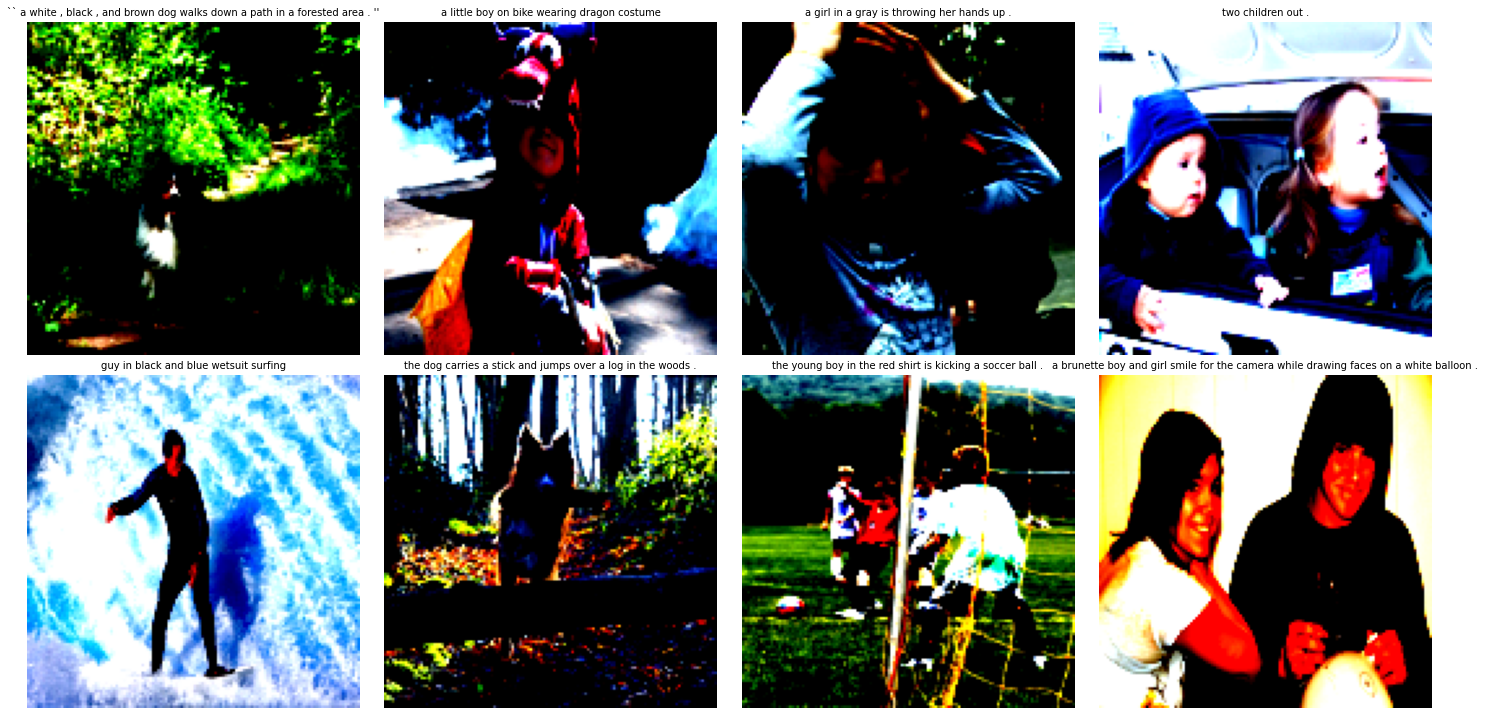

In [ ]:
# ADD YOUR CODE HERE
import matplotlib.pyplot as plt
import torch

def visualize_batch(data_loader, vocab, num_samples=8):
    # Get one batch
    images, captions = next(iter(data_loader))  # images: [B, C, H, W], captions: [B, L]
    
    # Convert images to numpy 
    images = images.permute(0, 2, 3, 1).numpy()  # [B, H, W, C]

    # Plot num_samples images and captions
    plt.figure(figsize=(20, 10))
    
    for i in range(min(num_samples, len(images))):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i])
        # print(images[i].shape)
        plt.axis('off')
 
        # 4. Convert token indices back to words
        token_indices = captions[i].tolist()
        token_words = [
            vocab.itos[idx] 
            for idx in token_indices 
            if idx != vocab.stoi["<PAD>"] and idx != vocab.stoi["<UNK>"]
        ]
        caption_text = ' '.join(token_words)


        plt.title(caption_text, fontsize=10)
    
    plt.tight_layout()
    plt.show()

visualize_batch(train_loader, dataset.vocab, num_samples=8)

## **4.2 Creating the Image Captioning Model**

For this assignment, **you are required to create your own custom image captioning model** and **compare its performance** with an existing pre-trained model.

---

### **Encoder-Attention-Decoder Architecture**

Your model should follow an **Encoder-Attention-Decoder** structure with the following components:

- The **Encoder** processes images to extract meaningful features. You can either design a **custom convolutional architecture** or use a **pre-trained model** like *ResNet*, but **fine-tuning is required** to adapt the features to the captioning task.
- The **Attention Layer** acts as an interface between the encoder and decoder. It leverages the extracted image features to compute **attention scores**, helping the decoder focus on relevant parts of the image during caption generation. For simplicity, use **Linear layers** to implement the attention mechanism.
- The **Decoder** is a sequence-based model (e.g., *LSTM*) that processes the image features and generates captions sequentially.

---

#### **Extra Credit Opportunity**
- Additional points will be awarded for implementing either a **Vision Transformer (ViT) encoder** or a **Transformer-based decoder** instead of an LSTM.

Here is an example of something similar to what we want to create:
<img src="https://drive.google.com/thumbnail?id=1wdddaLit7iEyCcVy5bS505NiYzL6c-4x&sz=w1000">

```python
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        return NotImplementedError

    def forward(self, images):
        return NotImplementedError
```

```python
class Attention(nn.Module):
    def __init__(self, encoder_dim,decoder_dim,attention_dim):
        super(Attention, self).__init__()
        return NotImplementedError

    def forward(self, features, hidden_state):
        return NotImplementedError
```

```python
class Decoder(nn.Module):
    def __init__(self, embed_size, vocab_size, attention_dim, encoder_dim, decoder_dim):
        return NotImplementedError

    def forward(self, features, captions):
        return NotImplementedError
```
```python
class EncoderDecoder(nn.Module):
    def __init__(self,embed_size, vocab_size, attention_dim, encoder_dim,decoder_dim):
        return NotImplementedError

    def forward(self, images, captions):
        return NotImplementedError
```

In [ ]:
import torch
from torch import nn
import torchvision

class EncoderViT(nn.Module):
    def __init__(self, encoded_dim=512, train_encoder=True, vit_model="vit_b_16", image_size=224, device="cuda"):
        super().__init__()

        self.device = torch.device(device)

        backbone = getattr(torchvision.models, vit_model)(weights="IMAGENET1K_V1").to(self.device)

        # store needed components
        self.patch_embed = backbone.conv_proj        # conv projection
        self.pos_embed   = backbone.encoder.pos_embedding
        self.cls_token   = backbone.class_token
        self.encoder     = backbone.encoder.layers   # transformer blocks
        self.ln_post     = backbone.encoder.ln       # final layer norm

        self.hidden_dim = backbone.hidden_dim
        self.patch_size = backbone.patch_size

        # infer number of patches
        H = W = image_size
        assert H % self.patch_size == 0
        self.num_patches = (H // self.patch_size) * (W // self.patch_size)

        # projection head
        self.proj = nn.Linear(self.hidden_dim, encoded_dim).to(self.device)

        # unfreeze ViT
        for p in self.parameters():
            p.requires_grad = train_encoder

    def forward(self, images):
        B = images.size(0)

        # patch embedding
        x = self.patch_embed(images)                     # [B, 768, h, w]
        x = x.flatten(2).transpose(1, 2)                 # [B, num_patches, dim]

        # CLS token
        cls = self.cls_token.expand(B, -1, -1)           # [B, 1, dim]
        x = torch.cat((cls, x), dim=1)                   # [B, 1+num_patches, dim]

        # add positional encoding
        x = x + self.pos_embed[:, : x.size(1), :]

        # transformer
        for blk in self.encoder:
            x = blk(x)

        x = self.ln_post(x)                              # [B, 1+N, dim]

        # remove CLS
        x = x[:, 1:, :]                                  # [B, num_patches, dim]

        return self.proj(x)


device = "cuda"
enc = EncoderViT(encoded_dim=512, train_encoder=False,
                 vit_model="vit_b_16", image_size=128, device=device).to(device)

dummy = torch.randn(2, 3, 128, 128, device=device)
out = enc(dummy)

print(out.shape)
print("num_patches:", enc.num_patches)


torch.Size([2, 64, 512])
num_patches: 64


In [ ]:
class Attention(nn.Module):
    """
    Attention Network.
    """

    def __init__(self, encoder_dim, decoder_dim, attention_dim):
        """
        :param encoder_dim: feature size of encoded images
        :param decoder_dim: size of decoder's RNN
        :param attention_dim: size of the attention network
        """
        super(Attention, self).__init__()
        self.encoder_att = nn.Linear(encoder_dim, attention_dim)  # linear layer to transform encoded image
        self.decoder_att = nn.Linear(decoder_dim, attention_dim)  # linear layer to transform decoder's output
        self.full_att = nn.Linear(attention_dim, 1)  # linear layer to calculate values to be softmax-ed
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)  # softmax layer to calculate weights

    def forward(self, encoder_out, decoder_hidden):
        """
        Forward propagation.

        :param encoder_out: encoded images, a tensor of dimension (batch_size, num_pixels, encoder_dim)
        :param decoder_hidden: previous decoder output, a tensor of dimension (batch_size, decoder_dim)
        :return: attention weighted encoding, weights
        """
        att1 = self.encoder_att(encoder_out)  # (batch_size, num_pixels, attention_dim)
        att2 = self.decoder_att(decoder_hidden)  # (batch_size, attention_dim)
        att = self.full_att(self.relu(att1 + att2.unsqueeze(1))).squeeze(2)  # (batch_size, num_pixels)
        alpha = self.softmax(att)  # (batch_size, num_pixels)
        attention_weighted_encoding = (encoder_out * alpha.unsqueeze(2)).sum(dim=1)  # (batch_size, encoder_dim)

        return attention_weighted_encoding, alpha



In [16]:
class Decoder(nn.Module):
    def __init__(self, embed_dim, hidden_dim, vocab_size, pad_idx, enc_dim=512, attention_dim=256, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.embed_dropout = nn.Dropout(p=dropout)
        self.attention = Attention(encoder_dim=enc_dim, decoder_dim=hidden_dim, attention_dim=attention_dim)
        self.lstm = nn.LSTM(embed_dim + enc_dim, hidden_dim, batch_first=True)
        self.out_dropout = nn.Dropout(p=dropout)
        self.fc = nn.Linear(hidden_dim, vocab_size)

        # initialize linear layers for deriving initial hidden/cell if used
        self.init_h = nn.Linear(enc_dim, hidden_dim)
        self.init_c = nn.Linear(enc_dim, hidden_dim)

    def forward(self, enc_out, captions):
        # enc_out: [B, N, enc_dim], captions: [B, L]
        B, L = captions.shape
        embeddings = self.embedding(captions)              # [B, L, E]
        embeddings = self.embed_dropout(embeddings)

        # init hidden/cell from mean encoder features
        mean_feats = enc_out.mean(dim=1)                   # [B, enc_dim]
        h = self.init_h(mean_feats).unsqueeze(0)           # [1, B, hidden_dim]
        c = self.init_c(mean_feats).unsqueeze(0)           # [1, B, hidden_dim]

        outputs = []
        attentions = []

        for t in range(L):
            ctx, alpha = self.attention(enc_out, h.squeeze(0))  # [B, enc_dim], [B, N]
            attentions.append(alpha)
            lstm_input = torch.cat([embeddings[:, t, :], ctx], dim=-1).unsqueeze(1)  # [B,1,E+enc]
            out, (h, c) = self.lstm(lstm_input, (h, c))        # out: [B,1,hidden]
            out = self.out_dropout(out)
            out_vocab = self.fc(out.squeeze(1))               # [B, vocab_size]
            outputs.append(out_vocab)

        outputs = torch.stack(outputs, dim=1)                 # [B, L, vocab_size]
        attentions = torch.stack(attentions, dim=1)           # [B, L, N]
        return outputs, attentions

    def init_hidden_state(self, encoder_features):
        mean_features = encoder_features.mean(dim=1)
        device = encoder_features.device
        h = self.init_h(mean_features).unsqueeze(0).to(device)
        c = self.init_c(mean_features).unsqueeze(0).to(device)
        return h, c

In [17]:
# ADD YOUR CODE HERE 
class EncoderDecoder(nn.Module):
    def __init__(
        self, 
        embed_size, 
        vocab_size, 
        attention_dim, 
        encoder_dim, 
        decoder_dim, 
        pad_idx, 
        train_encoder=True
    ):
        super().__init__()
        # Encoder
        self.encoder = EncoderViT(encoded_dim=encoder_dim, train_encoder=train_encoder)
        
        # Decoder
        self.decoder = Decoder(
            embed_dim=embed_size, 
            hidden_dim=decoder_dim, 
            vocab_size=vocab_size, 
            pad_idx=pad_idx, 
            enc_dim=encoder_dim,
            attention_dim=attention_dim
        )
    
    def forward(self, images, captions):
        # Extract image features
        features = self.encoder(images)
        # Generate predicted captions
        outputs, attentions = self.decoder(features, captions)
        return outputs, attentions




In [ ]:


model = EncoderDecoder(
    embed_size=256,
    vocab_size=len(dataset.vocab),
    attention_dim=256,
    encoder_dim=512,
    decoder_dim=512,
    pad_idx=dataset.vocab.stoi["<PAD>"],
    train_encoder=True   
).to(device)


## **5. Defining Loss Function and Optimizer**

**Loss Functions and their options:**

In an **image captioning task**, the model generates a sequence of words conditioned on an image. This involves both **sequence generation (language modeling)** and **image understanding**, making loss selection crucial for effective training. The primary loss function should optimize **word prediction** while ensuring **grammatical correctness and semantic coherence**.

Since our task involves **predicting discrete word tokens**, we typically use **sequence-based loss functions**, but we can also explore loss functions that account for **semantic meaning** and **alignment**.

---

### **a. Cross-Entropy Loss (Standard Sequence Prediction Loss)**  
The most common loss for text generation tasks is **Cross-Entropy Loss**, which measures the difference between the **predicted word probability distribution** and the **true word** in the sequence. It is computed as:

$$
\mathcal{L}_{CE} = -\sum_{t=1}^{T} y_t \log(\hat{y}_t)
$$

where:
- $T $ is the sequence length (number of words in the caption),
- $ y_t $ is the **ground truth word** (one-hot encoded),
- $ \hat{y}_t $ is the **predicted probability** of that word.

- **Pros:** Simple, well-established for text generation tasks, easy to implement.
- **Cons:** Treats each word prediction independently, ignoring sentence-level meaning, but useful during `teacher forcing`.

---

### **b. CIDER Loss (Reinforcement Learning-Based Caption Quality Loss)**  
Cross-Entropy loss focuses on **token-level** accuracy, but it does not capture **sentence-level fluency and meaning**. CIDER (Consensus-based Image Description Evaluation) helps optimize captions towards human-like descriptions.

$$
\mathcal{L}_{CIDEr} = 1 - CIDEr(\hat{Y}, Y)
$$

where $ CIDEr(\hat{Y}, Y) $ measures how similar the generated caption $ \hat{Y} $ is to multiple reference captions $ Y $.

- **Pros:** Optimizes for caption similarity to human references, improves fluency. Best suited for **fine-tuning after pretraining with Cross-Entropy** Loss.
- **Cons:** Harder to optimize, requires reinforcement learning.

---

### **c. Reinforcement Learning-Based Loss (REINFORCE with Self-Critical Sequence Training - SCST)**  
Since captioning is **sequential**, we can treat it as a reinforcement learning problem. Instead of directly predicting words, we train the model to maximize **rewards** (e.g., BLEU or CIDEr scores). This is done using the **REINFORCE** algorithm:

$$
\mathcal{L}_{RL} = - (r(\hat{Y}) - r(\bar{Y})) \sum_{t=1}^{T} \log P(y_t | y_{1:t-1}, X)
$$

where:
- $ r(\hat{Y}) $ is the reward for the generated caption,
- $ r(\bar{Y}) $ is the baseline reward (e.g., score from a greedy decoder).

- **Pros:** Optimizes **sentence-level metrics** instead of per-word accuracy, leading to better captions.  
- **Cons:** Computationally expensive, requires careful tuning.   

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

## **6. Training the Image Captioning Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

> **Note**: Pay attention to your choices. **Be aware of overfitting** and underfitting. Make sure the **loss is decreasing over the epochs**. Save the losses so that they can be visualized.

In [19]:
import time 
import os
import copy
import numpy as np
from collections import defaultdict
import torch
import torch.nn as nn

# ---------------- Checkpoint Functions ---------------- #
def save_checkpoint(scheduler, optimizer, model, loss_history, epoch, filename):
    checkpoint_dict = {
        'scheduler': scheduler.state_dict() if scheduler else None,
        'optimizer': optimizer.state_dict() if optimizer else None,
        'model': model.state_dict(),
        'loss_history': loss_history,
        'epoch': epoch
    }
    torch.save(checkpoint_dict, filename)
    
def load_checkpoint(scheduler, optimizer, model, filename, device=None):
    checkpoint_dict = torch.load(filename, map_location=device, weights_only=False)  
    model.load_state_dict(checkpoint_dict['model'])
    if optimizer is not None and checkpoint_dict['optimizer'] is not None:
        optimizer.load_state_dict(checkpoint_dict['optimizer'])
    if scheduler is not None and checkpoint_dict['scheduler'] is not None:
        scheduler.load_state_dict(checkpoint_dict['scheduler'])
    return checkpoint_dict['epoch'], checkpoint_dict

# ---------------- Training Function ---------------- # 
def train_caption_model(
    model,
    model_name,
    criterion,        
    optimizer,
    scheduler,
    dataloaders,
    device,
    pad_idx=0,
    epochs=25,
    patience=3,
    logging=False,
    checkpointing=False,
    resume_from_checkpoint=None,
    wandb=None,
    root_dir='./'
):
    model.to(device)
    criterion.to(device)
    
    since = time.time()
    start_epoch = 0
    loss_history = defaultdict(list)
    best_model_wts = copy.deepcopy(model.state_dict())
    min_val_loss = np.inf
    epochs_no_improve = 0

    # Resume from checkpoint if available
    if resume_from_checkpoint:
        try:
            start_epoch, _ = load_checkpoint(scheduler, optimizer, model, resume_from_checkpoint, device=device)
            print(f"Resuming from checkpoint at epoch {start_epoch}")
        except FileNotFoundError:
            print('Checkpoint not found! Training from scratch.\n')
        except Exception as e:
            print(f'Error loading checkpoint ({e})! Training from scratch.\n')

    if checkpointing:
        checkpoint_dir = os.path.join(root_dir, 'checkpoints/CaptionModel/')
        os.makedirs(checkpoint_dir, exist_ok=True)
        print('Saving best model in:', checkpoint_dir)

    print(f"Initial learning rate: {optimizer.param_groups[0]['lr']}")

    for epoch in range(start_epoch, epochs):
        print(f'\nEpoch {epoch + 1}/{epochs}')
        print('-' * 10)

        epoch_train_loss = None
        epoch_val_loss = None

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            num_samples = 0

            for batch in dataloaders[phase]:
                images, captions = batch
                images = images.to(device)
                captions = captions.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    # --- Forward pass ---
                    outputs, _ = model(images, captions[:, :-1])  # unpack outputs, attentions
                    outputs = outputs.reshape(-1, outputs.size(-1))
                    targets = captions[:, 1:].reshape(-1)

                    loss = criterion(outputs, targets)

                    if phase == 'train':
                        loss.backward()
                        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
                        optimizer.step()

                batch_size = images.size(0)
                running_loss += float(loss.item()) * batch_size
                num_samples += batch_size

                del outputs, targets, loss
                torch.cuda.empty_cache()

            epoch_loss = running_loss / num_samples
            loss_history[f'{phase}_total'].append(epoch_loss)
            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f}')

            if phase == 'train':
                epoch_train_loss = epoch_loss
            else:
                epoch_val_loss = epoch_loss

            # --- Track best model ---
            if phase == 'val':
                if epoch_loss < min_val_loss:
                    min_val_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    epochs_no_improve = 0

                    if checkpointing:
                        checkpoint_filename = f"{model_name}_best.pth"
                        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_filename)
                        save_checkpoint(scheduler, optimizer, model, loss_history, epoch, checkpoint_path)
                else:
                    epochs_no_improve += 1
                    if epochs_no_improve >= patience:
                        print('\nEarly stopping triggered!')
                        model.load_state_dict(best_model_wts)
                        if wandb is not None:
                            wandb.log({
                                "train_loss": epoch_train_loss,
                                "val_loss": epoch_val_loss,
                                "epoch": epoch
                            })
                        return model, (loss_history, epoch + 1)

        # --- W&B logging ---
        if wandb is not None:
            wandb.log({
                "train_loss": epoch_train_loss,
                "val_loss": epoch_val_loss,
                "epoch": epoch
            })

        # --- Scheduler step ---
        if scheduler is not None:
            scheduler.step()

    time_elapsed = time.time() - since
    print(f'\nTraining complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')

    model.load_state_dict(best_model_wts)
    return model, (loss_history, epochs)


In [ ]:
# -----------------------------
# Minimal Overfit Test
# -----------------------------
import torch
from torch.utils.data import DataLoader, TensorDataset

def build_overfit_dataloader(vocab_size=50, seq_len=6, batch_size=1):
    """
    Creates a tiny dataloader with 1 sample for overfitting.
    """
    images = torch.randn(batch_size, 3, 128, 128)
    captions = torch.randint(1, vocab_size, (batch_size, seq_len))  # avoid pad_idx=0
    return DataLoader(TensorDataset(images, captions), batch_size=batch_size, shuffle=False)


def run_overfit_test(model=None):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
 
    # --- Criterion & optimizer ---
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    scheduler = None  # disable scheduler for overfit

    # --- Tiny dataloaders (train and val the same!) ---
    tiny_loader = build_overfit_dataloader()
    dataloaders = {
        "train": tiny_loader,
        "val": tiny_loader
    }

    # --- Run training ---
    print("Running overfit test...\n")
    model, (history, epochs_ran) = train_caption_model(
        model=model,
        model_name="OverfitTest",
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        dataloaders=dataloaders,
        device=device,
        pad_idx=0,
        epochs=200,          # plenty for overfitting
        logging=False,
        checkpointing=False,
        resume_from_checkpoint=None,
        wandb=None,
        root_dir='./'
    )

    print("\nFinal train loss:", history["train_total"][-1])
    print("Overfit test complete!")
    return model, history

run_overfit_test(model)


Running overfit test...

Initial learning rate: 0.001

Epoch 1/200
----------
Train Loss: 7.9207
Val Loss: 7.5133

Epoch 2/200
----------
Train Loss: 7.5701
Val Loss: 6.5962

Epoch 3/200
----------
Train Loss: 6.5911
Val Loss: 5.6016

Epoch 4/200
----------
Train Loss: 5.7706
Val Loss: 4.5968

Epoch 5/200
----------
Train Loss: 4.4901
Val Loss: 3.6460

Epoch 6/200
----------
Train Loss: 3.6441
Val Loss: 2.8237

Epoch 7/200
----------
Train Loss: 3.1463
Val Loss: 2.1855

Epoch 8/200
----------
Train Loss: 2.4229
Val Loss: 1.6928

Epoch 9/200
----------
Train Loss: 1.7400
Val Loss: 1.3423

Epoch 10/200
----------
Train Loss: 1.6365
Val Loss: 1.0958

Epoch 11/200
----------
Train Loss: 1.1723
Val Loss: 0.8983

Epoch 12/200
----------
Train Loss: 1.0030
Val Loss: 0.7755

Epoch 13/200
----------
Train Loss: 0.7957
Val Loss: 0.6605

Epoch 14/200
----------
Train Loss: 0.9844
Val Loss: 0.5695

Epoch 15/200
----------
Train Loss: 0.7750
Val Loss: 0.5215

Epoch 16/200
----------
Train Loss: 0.6

(EncoderDecoder(
   (encoder): EncoderViT(
     (patch_embed): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
     (encoder): Sequential(
       (encoder_layer_0): EncoderBlock(
         (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
         (self_attention): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
         )
         (dropout): Dropout(p=0.0, inplace=False)
         (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
         (mlp): MLPBlock(
           (0): Linear(in_features=768, out_features=3072, bias=True)
           (1): GELU(approximate='none')
           (2): Dropout(p=0.0, inplace=False)
           (3): Linear(in_features=3072, out_features=768, bias=True)
           (4): Dropout(p=0.0, inplace=False)
         )
       )
       (encoder_layer_1): EncoderBlock(
         (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
         (self_attention): Multihe

In [ ]:
# ADD YOUR CODE HERE
import time
import wandb
from multiprocessing import cpu_count

wandb_args = dict(
    api_key = '132964cf596342f0513892d5ab88f706f59154a2', # Your API Key (access from settings)
    entity = 'faran1218',
    project = 'A1'
)


config = dict(
    # lr = 1e-3, # learning rate
    # wt = 1e-4, # weight decay
    # step = 3, # how often learning rate should be updated
    # gamma = 0.7, # learning rate scheduler The optimizer's updates become more stable and cautious, which may prevent overfitting because the model is less likely to latch onto noise in the training data.
    # epochs = 20,# number of passes of whole data\
    ##underfit
    lr = 3e-5, # Reduced learning rate
    wt = 1e-5, # Reduced weight decay
    step = 5, # Adjusted step size
    gamma = 0.95, # Adjusted gamma for scheduler
    epochs = 50, # Increased epochs
    patience = 3, # Early stopping patience

)
model_name =f"ImageCaption_{config['lr']}_{config['wt']}_{config['step']}_{config['gamma']}_{time.strftime('%Y%m%d-%H%M%S')}"

config['model_name'] = model_name
#################################################

os.environ['WANDB_API_KEY'] = wandb_args['api_key']

wandb_logger = wandb.init(
    name=config['model_name'],
    project=wandb_args['project'], # entity=wandb_args['entity'],
    config=config,# resume=True,
    # reinit=True
)
print("--- IGNORE ---")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
threads = cpu_count()

In [ ]:
model.train()
device = next(model.parameters()).device
vocab_size = len(vocab)
 
criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['wt'])
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=config['step'], gamma=config['gamma'])
train_caption_model(model=model,
                        model_name=model_name,
                        criterion=criterion,         
                        optimizer=optimizer,
                        scheduler=scheduler,
                        dataloaders=dataloaders,
                        device=device,
                        pad_idx=0,
                        epochs=config['epochs'],
                        patience=3,
                        logging=False,
                        checkpointing=True,
                        resume_from_checkpoint=False,
                        wandb=wandb,
                        )

## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

dict_keys(['scheduler', 'optimizer', 'model', 'loss_history', 'epoch'])


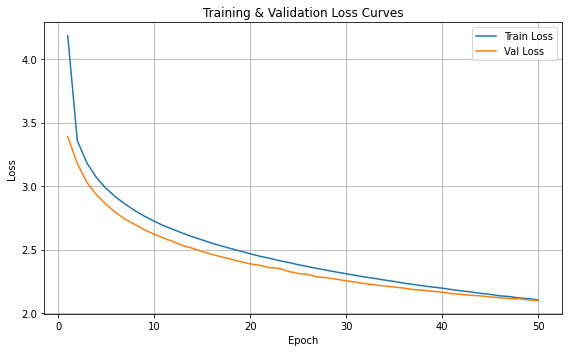

In [ ]:
import matplotlib.pyplot as plt

def plot_losses(history):
    train_losses = history["train_total"]
    val_losses = history["val_total"]
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Curves")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

model = EncoderDecoder(
    embed_size=256,
    vocab_size=len(dataset.vocab),
    attention_dim=256,
    encoder_dim=512,
    pad_idx=dataset.vocab.stoi["<PAD>"],
    decoder_dim=512
    ).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
epoch, loss_history = load_checkpoint(
    scheduler, optimizer, model,
    "checkpoints/CaptionModel/ImageCaption_3e-05_1e-05_5_0.95_20251122-233945_best.pth",
    device=device
)
print(loss_history.keys())
plot_losses(loss_history['loss_history'])


## **7.2 Visualizing Attention Weights**

Visualize the attention weigths in order to understand how your model learned.
For that, use the `context` variable returned by the **Attention class** to overlay them on the image.

```python
def plot_attention():
  raise NotImplementedError
```

Generated Caption: <UNK> <UNK> a man in a blue shirt is riding a skateboard on a ramp . <UNK> <UNK> <UNK> <UNK>


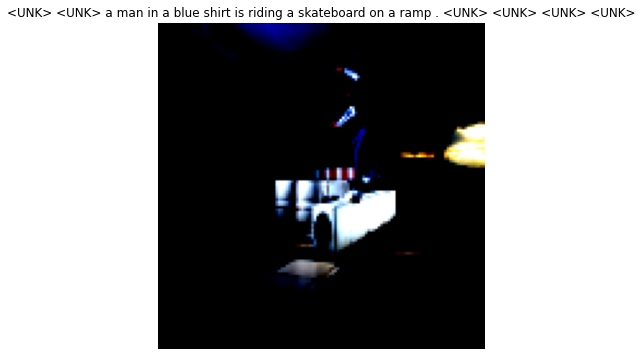

In [ ]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

def test_single_image(model, image_tensor, vocab, max_len=20):
    model.eval()
    device = next(model.parameters()).device
 
    image_tensor = image_tensor.unsqueeze(0).to(device)   # [1, 3, H, W]

    # ---------- ENCODER FORWARD ----------
    enc_out = model.encoder(image_tensor)                  # [1, num_patches, encoder_dim]

    # ---------- INITIALIZE DECODER HIDDEN STATE ----------
    h, c = model.decoder.init_hidden_state(enc_out)        # [1, B, hidden_dim]

    # Start token
    word = vocab.stoi["<SOS>"]
    caption_ids = []

    # ---------- AUTOREGRESSIVE DECODING ----------
    for _ in range(max_len):
        word_tensor = torch.tensor([word], device=device)          # [1]
        embeddings = model.decoder.embedding(word_tensor)          # [1, embed_dim]
        embeddings = model.decoder.embed_dropout(embeddings)

        # Attention over encoder features
        context, alpha = model.decoder.attention(enc_out, h.squeeze(0))  # [B, encoder_dim], [B, num_patches]

        # LSTM input: need batch_size x seq_len x input_dim
        lstm_input = torch.cat([embeddings, context], dim=-1).unsqueeze(1)  # [1, 1, embed+enc_dim]

        # Forward through LSTM
        out, (h, c) = model.decoder.lstm(lstm_input, (h, c))  # out: [B, 1, hidden_dim]
        out = model.decoder.out_dropout(out)

        # Predict next word
        preds = model.decoder.fc(out.squeeze(1))                 # [B, vocab_size]
        word = preds.argmax(dim=1).item()
        caption_ids.append(word)

        if word == vocab.stoi["<EOS>"]:
            break

    # ---------- CONVERT TOKENS → WORDS ----------
    caption_words = vocab.denumericalize(caption_ids)
    caption_text = " ".join(caption_words)
    print("Generated Caption:", caption_text)

    # ---------- DISPLAY IMAGE ----------
    img_np = image_tensor.squeeze(0).permute(1, 2, 0).cpu().numpy()
    img_np = np.clip(img_np, 0, 1)

    plt.figure(figsize=(6, 6))
    plt.imshow(img_np)
    plt.title(caption_text, fontsize=12)
    plt.axis("off")
    plt.show()

    return caption_words
  

# ---- Example usage ----
sample_img, _ = random.choice(test_dataset)
vocab = test_dataset.dataset.vocab

generated_caption = test_single_image(model, sample_img, vocab)


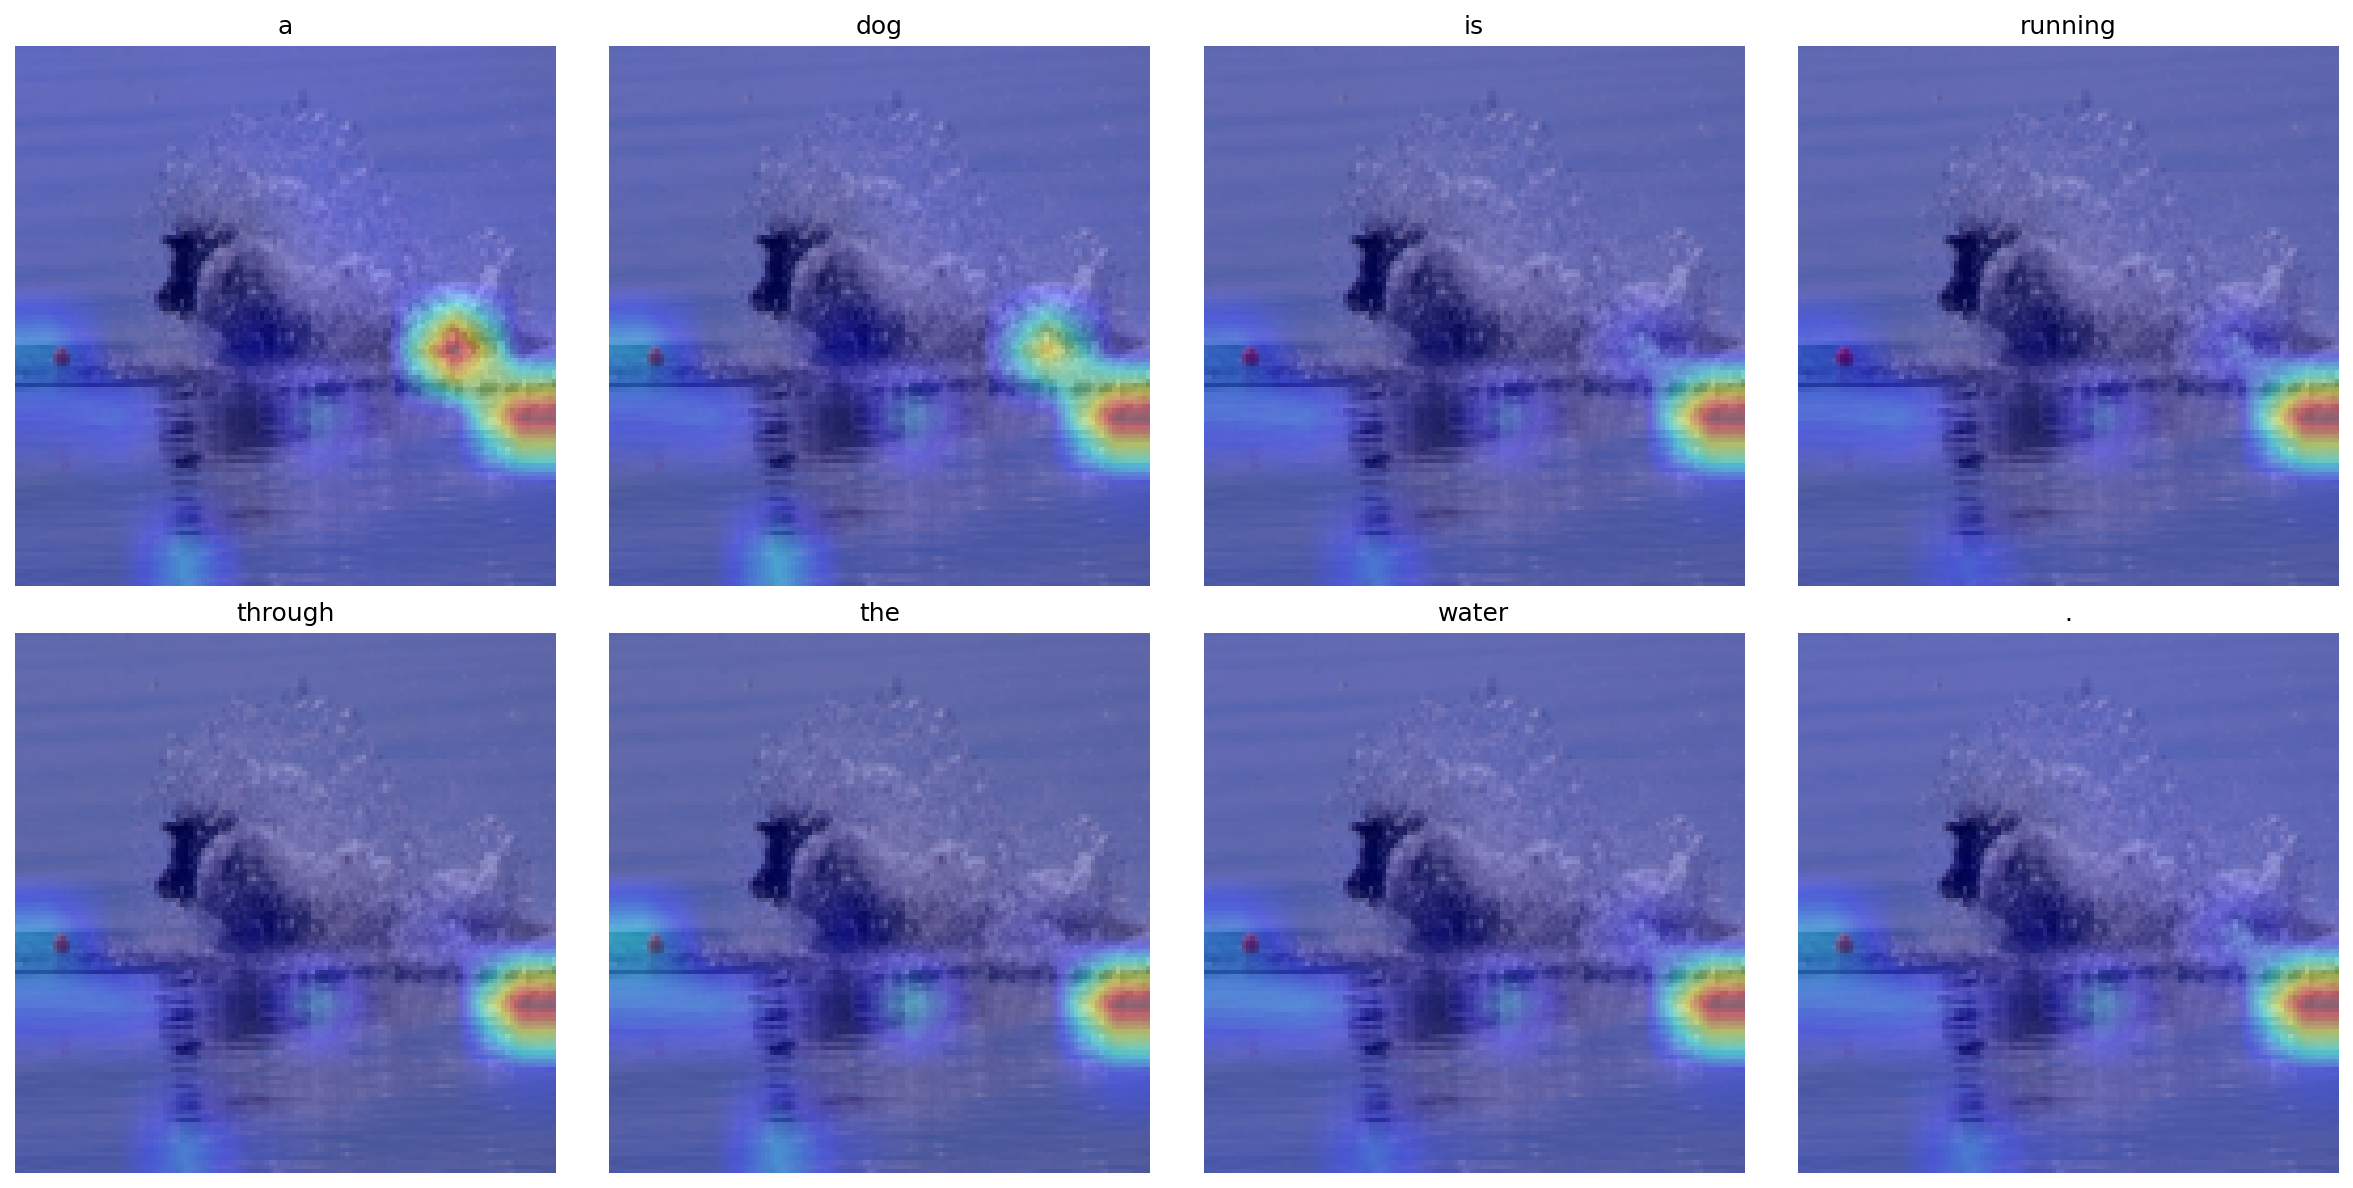

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import random 
 

def plot_attention_per_word(image_tensor, attention_maps, caption_tokens, vocab, max_cols=4, alpha=0.4, figsize_per_plot=4, dpi=150):
    # Convert image to numpy
    img = image_tensor.permute(1,2,0).cpu().numpy()
    img = (img - img.min()) / (img.max() - img.min())

    # Decode caption tokens
    caption_words = [w for w in vocab.denumericalize(caption_tokens) if w not in ["<PAD>", "<SOS>", "<EOS>"]]
    if len(caption_words) == 0:
        raise ValueError("No predicted words to plot attention for.")

    # Convert attention_maps to tensor and squeeze batch dimension
    if not torch.is_tensor(attention_maps):
        attention_maps = torch.tensor(attention_maps)
    if attention_maps.dim() == 3 and attention_maps.shape[1] == 1:
        attention_maps = attention_maps.squeeze(1)  # [seq_len, num_patches]

    seq_len, num_patches = attention_maps.shape
    grid_size = int(np.sqrt(num_patches))
    if grid_size**2 != num_patches:
        attention_maps = attention_maps[:, :grid_size*grid_size]

    # reshape and interpolate all attention maps
    attn = attention_maps.reshape(seq_len, 1, grid_size, grid_size)
    attn = F.interpolate(attn, size=img.shape[:2], mode='bilinear', align_corners=False)
    attn = attn.squeeze(1).detach().cpu().numpy()  # [seq_len, H, W]

    # Determine grid layout
    cols = min(max_cols, seq_len)
    rows = (seq_len + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot*cols, figsize_per_plot*rows), dpi=dpi)

    # Flatten axes for easy iteration
    if rows == 1:
        axes = axes.flatten() if cols > 1 else [axes]
    else:
        axes = axes.flatten()

    # Plot each word’s attention
    for i in range(rows*cols):
        ax = axes[i]
        if i < seq_len:
            ax.imshow(img)
            ax.imshow(attn[i], cmap='jet', alpha=alpha)
            ax.axis('off')
            ax.set_title(caption_words[i], fontsize=12)
        else:
            ax.axis('off')  # hide extra axes

    plt.tight_layout()
    plt.show()

 
# ---------------- Example usage ----------------
def generate_caption_with_attention_per_word_filtered(model, image_tensor, vocab, max_len=20):
    model.eval()
    device = next(model.parameters()).device
    image_tensor = image_tensor.unsqueeze(0).to(device)

    enc_out = model.encoder(image_tensor)                  # [1, num_patches, enc_dim]
    h, c = model.decoder.init_hidden_state(enc_out)       # [1, 1, hidden_dim], [1, 1, hidden_dim]

    word = vocab.stoi["<SOS>"]
    caption_ids = []
    attention_maps = []

    ctx_prev = torch.zeros_like(enc_out[:,0,:]).to(device)  # [1, enc_dim]

    for _ in range(max_len):
        # Embed previous word
        word_tensor = torch.tensor([word], device=device)
        emb = model.decoder.embedding(word_tensor)
        emb = model.decoder.embed_dropout(emb)

        # LSTM input = embedding + previous context
        lstm_input = torch.cat([emb, ctx_prev], dim=-1).unsqueeze(1)  # [1,1,768]
        out, (h, c) = model.decoder.lstm(lstm_input, (h, c))
        out = model.decoder.out_dropout(out)

        # Predict next word
        preds = model.decoder.fc(out.squeeze(1))  # [1, vocab_size]
        word = preds.argmax(dim=1).item()

        # Compute attention for current hidden state
        ctx, alpha = model.decoder.attention(enc_out, h.squeeze(0))

        # Only keep attention if the predicted word is valid
        if word not in [vocab.stoi["<PAD>"], vocab.stoi["<SOS>"], vocab.stoi["<EOS>"], vocab.stoi["<UNK>"]]:
            caption_ids.append(word)
            attention_maps.append(alpha.unsqueeze(0))

        # Update context for next step
        ctx_prev = ctx

        if word == vocab.stoi["<EOS>"]:
            break

    if len(attention_maps) == 0:
        return [], torch.empty(0)

    attention_maps = torch.cat(attention_maps, dim=0)  # [seq_len_filtered, 1, num_patches]
    return caption_ids, attention_maps
 
 
sample_img, _ = random.choice(test_dataset)
caption_ids, attn_maps = generate_caption_with_attention_per_word_filtered(model, sample_img, vocab)
 
plot_attention_per_word(sample_img, attn_maps, caption_ids, vocab)



## **7.3 Running Inference on the Image Captioning Model**

Pass test images through the **custom-trained image captioning model**, then evaluate its performance on the test set. Use the **[BLEU score](https://pytorch.org/text/stable/data_metrics.html)** as the evaluation metric, implementing **BLEU-1, BLEU-2, BLEU-3, and BLEU-4**.

To improve performance on the validation and test sets, you may use **beam search decoding** instead of standard greedy decoding.  

[Beam Search](https://d2l.ai/chapter_recurrent-modern/beam-search.html) is a more sophisticated decoding algorithm that **considers multiple possible caption sequences at each time step instead of selecting the most probable word at every step (greedy decoding)**. It maintains a fixed number of candidate sequences (beam width) and expands them based on their cumulative probabilities, ultimately selecting the **most likely complete caption**.  

Using beam search can lead to **more fluent and accurate captions** by avoiding suboptimal word choices that greedy decoding might make.

```python
def test_model()
  raise NotImplementedError
```

In [ ]:
import torch
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tqdm import tqdm
import string

def normalize_caption(words): 
    table = str.maketrans('', '', string.punctuation)
    return [w.lower().translate(table) for w in words]

def beam_search(model, image_tensor, vocab, beam_width=5, max_len=20): 
    model.eval()
    device = next(model.parameters()).device
    image_tensor = image_tensor.unsqueeze(0).to(device)
    encoder_out = model.encoder(image_tensor)  # [1, num_patches, enc_dim]

    h, c = model.decoder.init_hidden_state(encoder_out)
    sequences = [[[], 0.0, h, c]]  # (seq, score, h, c)

    for _ in range(max_len):
        all_candidates = []
        for seq, score, h_t, c_t in sequences:
            # Stop expanding if <EOS> was predicted
            if len(seq) > 0 and seq[-1] == vocab.stoi["<EOS>"]:
                all_candidates.append([seq, score, h_t, c_t])
                continue

            prev_word = seq[-1] if seq else vocab.stoi["<SOS>"]
            word_tensor = torch.tensor([prev_word], device=device)
            emb = model.decoder.embedding(word_tensor)
            emb = model.decoder.embed_dropout(emb)  # [1, embed_dim]

            # Compute attention context
            ctx, _ = model.decoder.attention(encoder_out, h_t)

            # Flatten context to [1, enc_dim]
            if ctx.dim() == 4:  # [1, heads, num_patches, head_dim]
                ctx = ctx.mean(dim=1).mean(dim=1)
            elif ctx.dim() == 3:  # [1, num_patches, enc_dim]
                ctx = ctx.mean(dim=1)
            elif ctx.dim() == 2:  # [1, enc_dim]
                pass
            else:
                raise ValueError(f"Unexpected ctx shape: {ctx.shape}")

            # Concatenate embedding and context
            lstm_input = torch.cat([emb, ctx], dim=-1).unsqueeze(1)
            out, (h_new, c_new) = model.decoder.lstm(lstm_input, (h_t, c_t))
            out = model.decoder.out_dropout(out)

            preds = model.decoder.fc(out.squeeze(1))
            log_probs = torch.log_softmax(preds, dim=1).squeeze(0)

            # Top-k candidates
            topk_probs, topk_words = log_probs.topk(beam_width)
            for k in range(beam_width):
                word = topk_words[k].item()
                prob = topk_probs[k].item()
                if word == vocab.stoi.get("<UNK>", -1):
                    continue
                all_candidates.append([seq + [word], score + prob, h_new, c_new])

        if not all_candidates:
            break

        sequences = sorted(all_candidates, key=lambda x: x[1], reverse=True)[:beam_width]

    # Return best sequence without special tokens
    best_seq = sequences[0][0] if sequences else []
    best_words = [w for w in vocab.denumericalize(best_seq)
                  ]
    return best_words

def test_model(model, test_loader, vocab, beam_width=5, max_len=20):
    """
    Run inference on Flickr8k test set and compute BLEU-1 to BLEU-4.
    Supports 5 reference captions per image.
    """
    model.eval()
    all_references = []
    all_hypotheses = []
    smooth_fn = SmoothingFunction().method1

    for images, captions in tqdm(test_loader):
        # Check if captions have multiple references
        if captions.dim() == 3:  # [batch_size, num_refs, max_len]
            num_refs = captions.size(1)
        else:  # [batch_size, max_len]
            num_refs = 1
            captions = captions.unsqueeze(1)  # add dummy reference dimension

        for i in range(images.size(0)):
            img = images[i]

            # Collect all references for this image
            refs = []
            for j in range(num_refs):
                cap = captions[i, j]  # already a 1D tensor
                ref_words = [vocab.itos[idx.item()] for idx in cap
                             if idx.item() ]
                ref_words = normalize_caption(ref_words)
                refs.append(ref_words)
            all_references.append(refs)

            # Generate predicted caption
            pred_words = beam_search(model, img, vocab, beam_width=beam_width, max_len=max_len)
            pred_words = normalize_caption(pred_words)
            all_hypotheses.append(pred_words)

    # Compute BLEU scores
    bleu_1 = sum([sentence_bleu(ref, hyp, weights=(1, 0, 0, 0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_2 = sum([sentence_bleu(ref, hyp, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_3 = sum([sentence_bleu(ref, hyp, weights=(0.33, 0.33, 0.33, 0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_4 = sum([sentence_bleu(ref, hyp, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)

    print(f"BLEU-1: {bleu_1*100:.2f}")
    print(f"BLEU-2: {bleu_2*100:.2f}")
    print(f"BLEU-3: {bleu_3*100:.2f}")
    print(f"BLEU-4: {bleu_4*100:.2f}")

    return bleu_1, bleu_2, bleu_3, bleu_4


## **8. Loading an Existing Image Captioning Model**

You are free to select any pre-trained image captioning model available. We recommend considering the following options:

1. **BLIP (Bootstrapping Language-Image Pre-training):** BLIP is a versatile vision-language pre-training framework that excels in both understanding and generation tasks. It effectively utilizes noisy web data by generating and filtering synthetic captions, achieving SOTA results in image captioning. Pre-trained models and code are available on [GitHub](https://github.com/salesforce/BLIP) and the [Hugging Face Model Hub](https://huggingface.co/Salesforce/blip-image-captioning-base).

2. **ViT-GPT2 Image Captioning Model:** This model combines a Vision Transformer (ViT) as the encoder and GPT-2 as the decoder, effectively connecting visual inputs with text generation. A fine-tuned version on the Flickr8k dataset is accessible on the [Hugging Face Model Hub](https://huggingface.co/NourFakih/image-captioning-Vit-GPT2-Flickr8k).

In [ ]:
# !pip install transformers 
# !pip install pillow


Predicted caption: a group of people walking up a hill


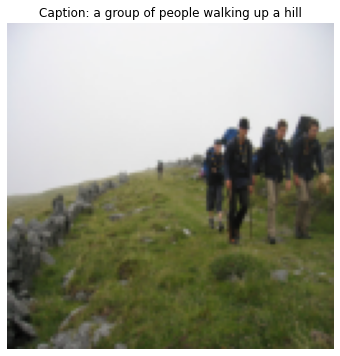

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
import random 

model_dir = "./.blip_model"   
 
processor = BlipProcessor.from_pretrained(model_dir)
blip_model = BlipForConditionalGeneration.from_pretrained(model_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
blip_model.to(device)
blip_model.eval()

def denormalize(img_tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]): 
    img = img_tensor.clone()
    for t, m, s in zip(img, mean, std):
        t.mul_(s).add_(m)
    return img.clamp(0, 1)

def generate_caption_from_tensor(image_tensor, max_length=20, num_beams=3): 
    blip_model.eval()
    image_tensor = image_tensor.unsqueeze(0).to(device)   

    # Convert tensor to PIL Image after denormalizing
    image_tensor_denorm = denormalize(image_tensor.squeeze(0).cpu())
    image = ToPILImage()(image_tensor_denorm)

    # Preprocess and generate
    inputs = processor(images=image, return_tensors="pt").to(device)
    with torch.no_grad():
        output_ids = blip_model.generate(
            **inputs,
            max_length=max_length,
            num_beams=num_beams,
            early_stopping=True
        )

    caption = processor.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Example: select a random image from your dataset
sample_img = random.choice(test_dataset)[0]  # tensor [C,H,W]

# Generate caption
caption = generate_caption_from_tensor(sample_img)
print("Predicted caption:", caption)

# Plot image with caption
sample_img_denorm = denormalize( sample_img)
pil_image = ToPILImage()(sample_img_denorm)
plt.figure(figsize=(6,6))
plt.imshow(pil_image)
plt.axis("off")
plt.title(f"Caption: {caption}", fontsize=12)
plt.show()


## **9. Evaluating the Existing Image Captioning Model**

For evaluation, apply the **same metrics** used in the assessment of your custom image captioning model to ensure a consistent and fair comparison.

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tqdm import tqdm

def evaluate_blip_model(model, processor, data_loader, vocab, device, beam_width=3, max_len=20):

    model.eval()
    smooth_fn = SmoothingFunction().method1
    all_references = []
    all_hypotheses = []

    for images, captions_batch in tqdm(data_loader):
        images = images.to(device)
        batch_size = images.size(0)

        for i in range(batch_size):
            img_tensor = images[i]
            captions = captions_batch[i]

            # Generate caption from BLIP
            generated_caption = generate_caption_from_tensor(img_tensor, max_length=max_len, num_beams=beam_width)
            hyp_tokens = generated_caption.lower().split()  # list of words

            # Decode dataset reference caption(s) using your vocab
            if isinstance(captions, torch.Tensor):
                captions_list = [captions]  # single reference per image
            else:
                captions_list = captions  # list of tensors

            ref_captions = []
            for ref in captions_list:
                if isinstance(ref, torch.Tensor):
                    ref = ref.tolist()
                # Remove padding and special tokens
                ref = [t for t in ref if t not in [vocab.stoi["<PAD>"], vocab.stoi["<SOS>"], vocab.stoi["<EOS>"], vocab.stoi.get("<UNK>", -1)]]
                words = vocab.denumericalize(ref)
                ref_captions.append(words)

            all_references.append(ref_captions)
            all_hypotheses.append(hyp_tokens)

    # Compute BLEU scores
    bleu_1 = sum([sentence_bleu(ref, hyp, weights=(1,0,0,0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_2 = sum([sentence_bleu(ref, hyp, weights=(0.5,0.5,0,0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_3 = sum([sentence_bleu(ref, hyp, weights=(0.33,0.33,0.33,0), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)
    bleu_4 = sum([sentence_bleu(ref, hyp, weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth_fn)
                  for ref, hyp in zip(all_references, all_hypotheses)]) / len(all_references)

    print(f"BLEU-1: {bleu_1*100:.2f}")
    print(f"BLEU-2: {bleu_2*100:.2f}")
    print(f"BLEU-3: {bleu_3*100:.2f}")
    print(f"BLEU-4: {bleu_4*100:.2f}")

    return bleu_1, bleu_2, bleu_3, bleu_4


## **10. Comparing the Two Models**

Compare the performance of both models using **BLEU-1, BLEU-2, BLEU-3, and BLEU-4** scores. Visualize predictions from both models on the **same batch of test images** to highlight their differences.

Analyze and justify the differences in performance, discussing factors such as model architecture, attention mechanisms, and training strategies. Finally, **propose possible improvements for your custom model**.

> **Answer**:

In [ ]:
### Custom Model EVALUATION
bleu1, bleu2, bleu3, bleu4 = test_model(model, test_loader, vocab, beam_width=3, max_len=20)


100%|██████████| 127/127 [01:56<00:00,  1.09it/s]


BLEU-1: 20.61
BLEU-2: 8.58
BLEU-3: 4.60
BLEU-4: 2.89


In [ ]:
## BLIP Model EVALUATION
bleu1, bleu2, bleu3, bleu4 = evaluate_blip_model(blip_model, processor, test_loader, vocab, device, beam_width=3, max_len=20)


100%|██████████| 127/127 [07:03<00:00,  3.33s/it]


BLEU-1: 28.36
BLEU-2: 16.16
BLEU-3: 10.26
BLEU-4: 6.84


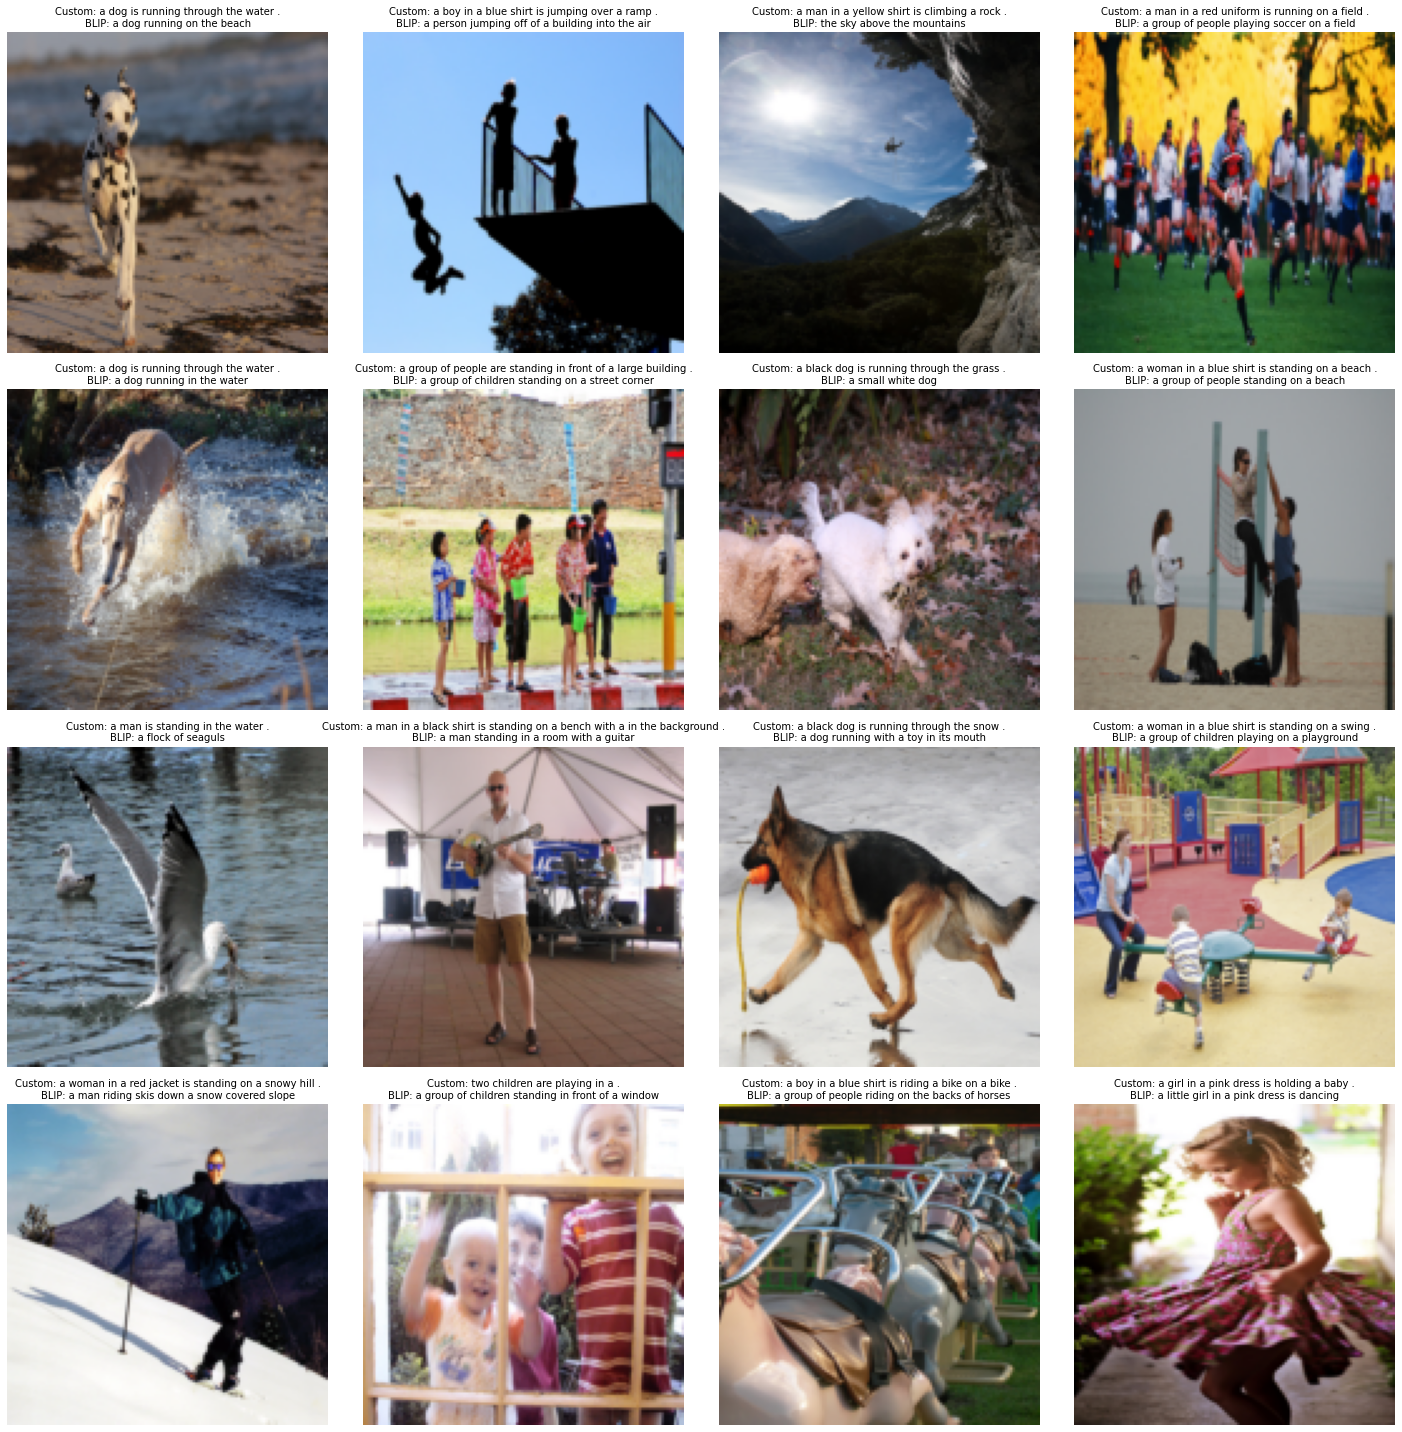

In [ ]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

def get_custom_caption(custom_model, image_tensor, vocab, max_len=20):
    custom_model.eval()
    device = next(custom_model.parameters()).device

    image_tensor = image_tensor.unsqueeze(0).to(device)  # [1, 3, H, W]
    enc_out = custom_model.encoder(image_tensor)
    h, c = custom_model.decoder.init_hidden_state(enc_out)
    word = vocab.stoi["<SOS>"]
    caption_ids = []

    for _ in range(max_len):
        word_tensor = torch.tensor([word], device=device)
        embeddings = custom_model.decoder.embedding(word_tensor)
        embeddings = custom_model.decoder.embed_dropout(embeddings)
        context, _ = custom_model.decoder.attention(enc_out, h.squeeze(0))
        lstm_input = torch.cat([embeddings, context], dim=-1).unsqueeze(1)
        out, (h, c) = custom_model.decoder.lstm(lstm_input, (h, c))
        out = custom_model.decoder.out_dropout(out)
        preds = custom_model.decoder.fc(out.squeeze(1))
        word = preds.argmax(dim=1).item()
        caption_ids.append(word)
        if word == vocab.stoi["<EOS>"]:
            break

    caption_words = vocab.denumericalize(caption_ids)
    return " ".join(caption_words) 

def visualize_captions_grid(custom_model, blip_model, processor, data_loader, device, vocab, max_len=20, num_images=16):
    custom_model.eval()
    blip_model.eval()

    images, _ = next(iter(data_loader))
    images = images.to(device)
    num_images = min(num_images, images.size(0))

    cols = 4
    rows = (num_images + cols - 1) // cols
    plt.figure(figsize=(5*cols, 5*rows))

    for i in range(num_images):
        img_tensor = images[i]

        # Denormalize for plotting and BLIP
        denorm_img = denormalize(img_tensor.clone()).cpu()  # move to CPU
        pil_image = ToPILImage()(denorm_img)

        # Captions
        custom_caption = get_custom_caption(custom_model, img_tensor, vocab, max_len=max_len)
        filtered_caption = " ".join([w for w in custom_caption.split() if w not in ["<PAD>", "<SOS>", "<EOS>", "<UNK>"]])
        blip_caption = generate_caption_from_tensor(denorm_img, max_length=max_len)

        # Plot
        plt.subplot(rows, cols, i+1)
        plt.imshow(pil_image)
        plt.axis("off")
        plt.title(f"Custom: {filtered_caption}\nBLIP: {blip_caption}", fontsize=10)

    plt.tight_layout()
    plt.show()


# ---- Example usage ----
vocab = test_dataset.dataset.vocab
visualize_captions_grid(custom_model=model,
                        blip_model=blip_model,
                        processor=processor,
                        data_loader=test_loader,
                        device=device,
                        vocab=vocab,
                        max_len=20,
                        num_images=16)


Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [59]:
from datetime import datetime, timedelta, timezone

deadline = datetime(2025, 11, 25, 23, 59, 0, tzinfo=timezone.utc)

def time_until_deadline():
    now = datetime.now(timezone.utc)
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 2 days, 8 hours, 39 minutes
